# Convolutional Network Model

## Train for 5 epochs

Observe the loss decreasing while training.

In [2]:
!python3 ConvolutionalNetwork.py --max_epochs=5

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name | Type       | Params | In sizes       | Out sizes
-----------------------------------------------------------------
0 | seq  | Sequential | 13 K   | [1, 1, 28, 28] | [1, 10]  
Epoch 0:  83%|█████████▏ | 782/939 [00:18<00:03, 42.32it/s, loss=0.048, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 0:  98%|██████████▊| 921/939 [00:21<00:00, 42.97it/s, loss=0.048, v_num=0]
Epoch 0: 100%|█| 939/939 [00:21<00:00, 42.78it/s, loss=0.048, v_num=0, val_loss=
Epoch 1:  83%|▊| 782/939 [00:18<00:03, 41.69it/s, loss=0.048, v_num=0, val_loss=
Validating: 0it [00:00, ?it/s]
Validating:   1%|▏                              | 1/157 [00:02<05:23,  2.08s/it]
Epoch 1:  85%|▊| 799/939 [00:20<00:03, 38.17it/s, loss=0.048, v_num=0, val_loss=
Epoch 1:  87%|▊| 816/939 [00:21<00:03, 38.78it/s, loss=0.048, v_num=0, val_loss=
Epoch 1:  89%|▉| 833/939 [00:21<00:02, 39.39it/s, loss=0.048, v_num=0, val_loss=
Epoch 1:  91%|▉| 850/939 [00

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs

After only **5 epochs**, the model achieves **98.5% accuracy** on the MNIST test data set.

It performs better than the previous neural network model.

In [4]:
!tensorboard --logdir=./lightning_logs

W0909 18:13:02.800810 123145376571392 plugin_event_accumulator.py:321] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0909 18:13:02.802042 123145376571392 plugin_event_accumulator.py:359] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [6]:
__import__("sys").path.append("..")
import utils
from ConvolutionalNetwork import ConvolutionalNetwork

model = utils.load_trained_model_for_evaluation(ConvolutionalNetwork, 0)
print(model)

ConvolutionalNetwork(
  (seq): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten()
    (7): Linear(in_features=800, out_features=10, bias=True)
    (8): LogSoftmax(dim=1)
  )
)


## Predict MNIST labels

Original label:  7 Predicted label:  7


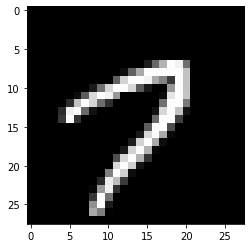

Original label:  6 Predicted label:  6


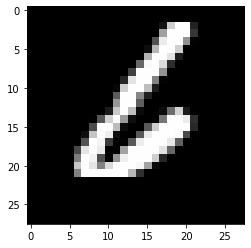

Original label:  1 Predicted label:  1


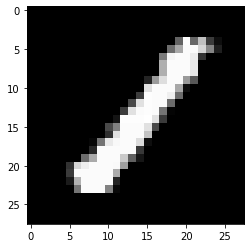

Original label:  8 Predicted label:  8


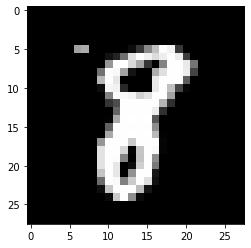

Original label:  1 Predicted label:  1


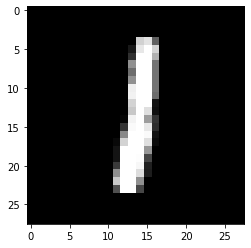

Original label:  7 Predicted label:  7


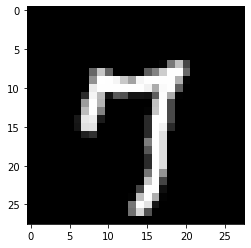

Original label:  1 Predicted label:  1


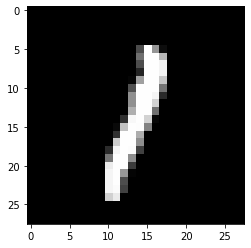

Original label:  8 Predicted label:  8


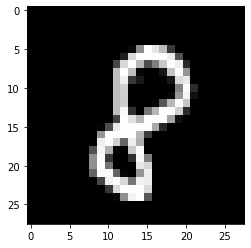

Original label:  2 Predicted label:  2


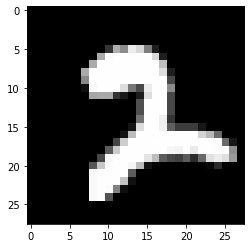

Original label:  5 Predicted label:  5


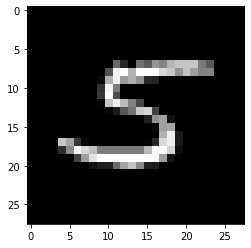

In [7]:
import torch
import random

test_len = model.mnist_test.data.shape[0]

for i in range(0, 10):
    orig_img, orig_label = model.mnist_test[random.randint(0, test_len)]
    orig_img = orig_img.view(1, 1, 28, 28)
    classes = model(orig_img)
    predicted_label = torch.max(classes.data, 1).indices.item()

    print("Original label: ", orig_label, "Predicted label: ", predicted_label)
    utils.plot_images([orig_img.view(28, 28)])